In [7]:
%pip install matplotlib
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.5 MB 1.8 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.5 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.5 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.5 MB 1.8 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.5 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.5 MB 1.8 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.5 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/11.5 MB 1.8 MB/s eta 0:00:05
   ------------- ------------------

In [11]:
import math
import random
import csv
import matplotlib.pyplot as plt
import numpy as np

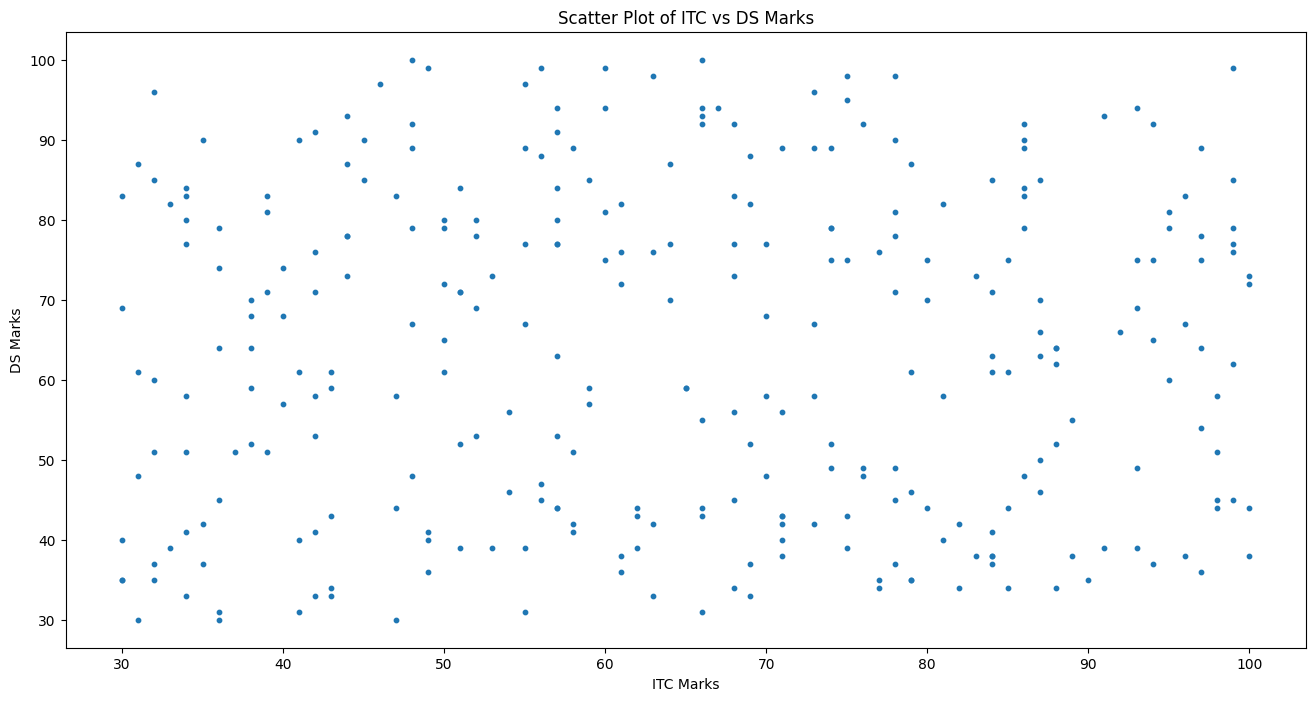

In [12]:
xa = []
ya = []

with open('pw-5.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        xa.append(int(row['itc_marks']))
        ya.append(int(row['ds_marks']))


plt.figure(figsize=(16, 8))

plt.scatter(xa, ya, s=10)

plt.xlabel('ITC Marks')
plt.ylabel('DS Marks')
plt.title('Scatter Plot of ITC vs DS Marks')

plt.show()


In [13]:
def dist(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def mean(lst):
    if not lst:
        return (0.0, 0.0)
    arr = np.array(lst)
    return tuple(np.mean(arr, axis=0))

def kRandPick(k, lst):
    if k > len(lst):
        raise ValueError("k value is greater than the length of the array.")
    return random.sample(lst, k)

def kMeanCluster(k, x, y):
    test_xl = kRandPick(k, x)
    test_yl = kRandPick(k, y)
    stop = False
    cluster_labels = np.zeros(len(x), dtype=int)
    
    while not stop:
        kdis = [[] for _ in range(k)]
        
        for idx, (i, j) in enumerate(zip(x, y)):
            tin = np.argmin([dist(tx, i, ty, j) for tx, ty in zip(test_xl, test_yl)])
            kdis[tin].append((i, j))
            cluster_labels[idx] = tin
        
        new_test = [mean(cluster) for cluster in kdis]
        n_t_xl, n_t_yl = zip(*new_test)
        
        if np.allclose(n_t_xl, test_xl) and np.allclose(n_t_yl, test_yl):
            stop = True
            return list(n_t_xl), list(n_t_yl), cluster_labels.tolist()
        
        test_xl, test_yl = list(n_t_xl), list(n_t_yl)

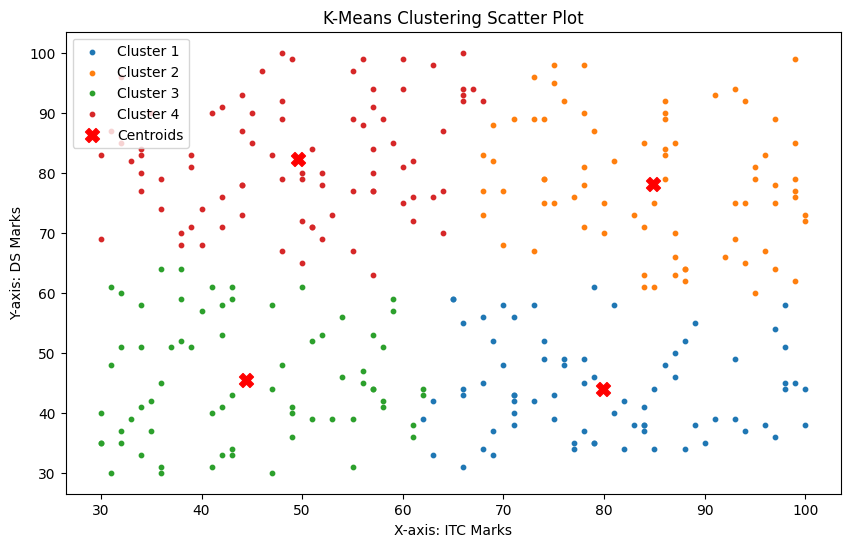

In [10]:
k = 4
cx, cy, cluster_labels = kMeanCluster(k, xa, ya)

plt.figure(figsize=(10, 6))

for i in range(k):
    cluster_points_x = [xa[j] for j in range(len(xa)) if cluster_labels[j] == i]
    cluster_points_y = [ya[j] for j in range(len(ya)) if cluster_labels[j] == i]
    plt.scatter(cluster_points_x, cluster_points_y, s=10, label=f'Cluster {i+1}')

plt.scatter(cx, cy, color='red', marker='X', s=100, label='Centroids')
plt.xlabel('X-axis: ITC Marks')
plt.ylabel('Y-axis: DS Marks')
plt.title('K-Means Clustering Scatter Plot')
plt.legend()
plt.show()